# EDA of Credit Scoring

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from scipy.stats import mode

In [193]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [194]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [195]:
drop_cols = ['Name', 'SSN']
cleaned_df = df.drop(drop_cols, axis=1)

In [208]:
cleaned_df['Type_of_Loan'][9]

['Credit-BuilderLoan']

In [197]:
cleaned_df['Type_of_Loan'].str.split(',')

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [198]:
import re

In [199]:
search = ' and '
space = ' '

In [200]:
def search_and_remove(li, search_word):

    for i, word in enumerate(li):
        if search_word in word:
            li[i] = re.sub(search_word, '', word)
            # li[i] = re.sub(space, '', word)
        # else:
            # li[i] = re.sub(space, '', word)
    return li

def white_space_remover(li, ws):

    for i, word in enumerate(li):
        if ws in word:
            li[i] = re.sub(ws, '', word)
    return li

In [201]:
search_and_remove(['Auto Loan',  'Credit-Builder Loan',  'Personal Loan',  ' and Home Equity Loan'], search)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']

In [205]:
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].str.split(',').apply(lambda x :  search_and_remove(x, search))
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].apply(lambda x :  white_space_remover(x, space))

In [206]:
cleaned_df['Type_of_Loan']

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [190]:
cleaned_df['Type_of_Loan'][0]

['Auto Loan', ' Credit-Builder Loan', ' Personal Loan', 'Home Equity Loan']

In [209]:
pd.get_dummies(cleaned_df['Type_of_Loan'])

TypeError: unhashable type: 'list'

In [210]:
type_of_loans = cleaned_df['Type_of_Loan']

In [214]:
pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(axis=1)

AutoLoan  Credit-BuilderLoan  DebtConsolidationLoan  HomeEquityLoan  \
0     0         1                   0                      0               0   
      1         0                   1                      0               0   
      2         0                   0                      0               0   
      3         0                   0                      0               1   
1     0         1                   0                      0               0   
...           ...                 ...                    ...             ...   
99997 1         0                   0                      0               0   
99998 0         1                   0                      0               0   
      1         0                   0                      0               0   
99999 0         1                   0                      0               0   
      1         0                   0                      0               0   

         MortgageLoan  NoData  NotSpecified  PaydayLoan  PersonalLoan  \
0     0             0       0             0           0             0   
      1             0       0             0           0             0   
      2             0       0             0           0             1   
      3             0       0             0           0             0   
1     0             0       0             0           0             0   
...               ...     ...           ...         ...           ...   
99997 1             0       0             0           0             0   
99998 0             0       0             0           0             0   
      1             0       0             0           0             0   
99999 0             0       0             0           0             0   
      1             0       0             0           0             0   

         StudentLoan  
0     0            0  
      1            0  
      2            0  
      3            0  
1     0            0  
...              ...  
99997 1            1  
99998 0            0  
      1            1  
99999 0            0  
      1            1  

[364696 rows x 10 columns]

In [218]:
loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)
loan_dummy_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_43639/2085967712.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)


,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,0,1


In [236]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['ID',
 'Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Credit_Score']

In [237]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Standard


(array([  425.,  2172.,  4887., 11911., 14825., 17011., 13142., 17052.,
        12151.,  6424.]),
 array([5.71586063, 6.10721011, 6.4985596 , 6.88990909, 7.28125857,
        7.67260806, 8.06395754, 8.45530703, 8.84665651, 9.238006  ,
        9.62935548]),
 <BarContainer object of 10 artists>)

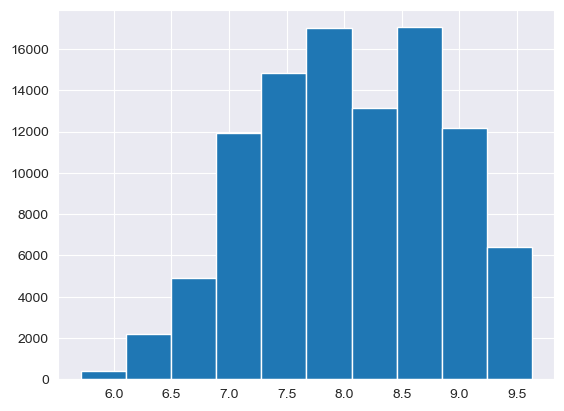

In [239]:
plt.hist(np.log(cleaned_df['Monthly_Inhand_Salary']))

(array([33024., 21832., 11080., 11680.,  7672.,  5208.,  3976.,  3088.,
         1192.,  1248.]),
 array([  7005.93 ,  24304.065,  41602.2  ,  58900.335,  76198.47 ,
         93496.605, 110794.74 , 128092.875, 145391.01 , 162689.145,
        179987.28 ]),
 <BarContainer object of 10 artists>)

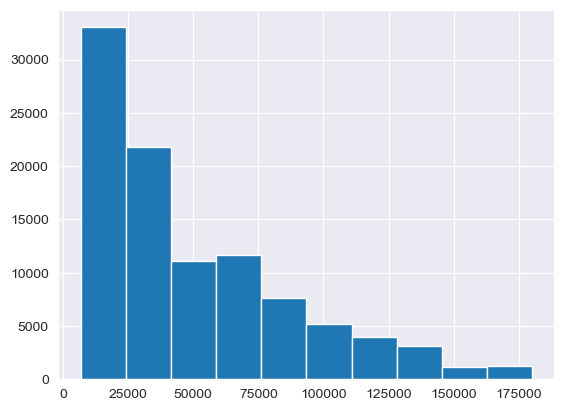

In [241]:
plt.hist(cleaned_df['Annual_Income'])